# **Problem Statement: Medical Cost Prediction Using Regression**

The main goal of this project is to predict medical insurance cost (charges) based on age, BMI, smoking status, children count, region etc. Health insurance companies use it to fix premium rates, assess risk, and optimize healthcare cost.

#**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#**Load the Dataset**

In [3]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#  **Understand the Data**

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Check for Missing Values**

In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Check Data Types & Encoding**

In [8]:
# Check unique values in categorical columns
print(df["sex"].unique())
print(df["smoker"].unique())
print(df["region"].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
# Convert categorical columns to numerical if needed
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


#  **Univariate Analysis** (Individual Feature Analysis)

* Visualizing Numerical Features

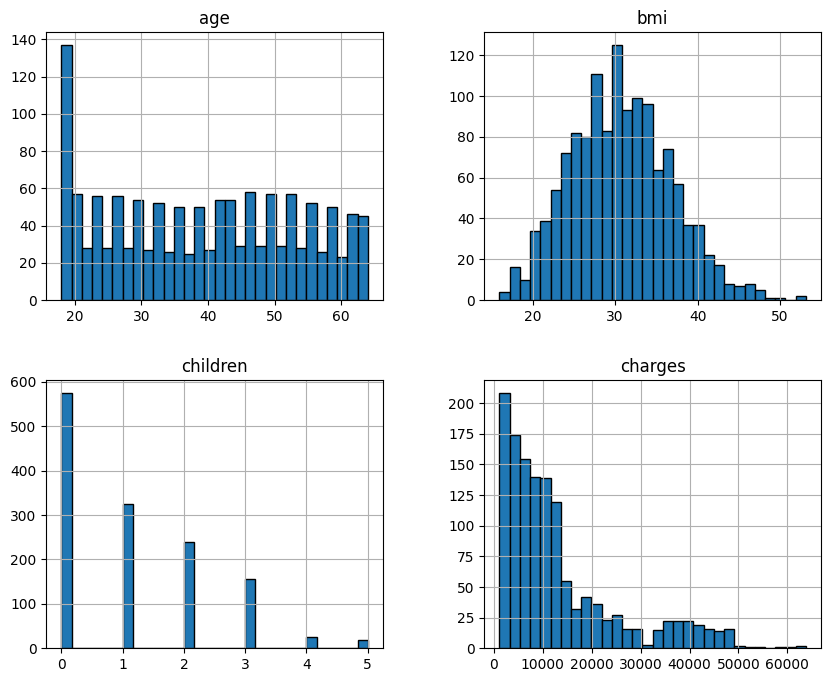

In [12]:
# Histogram for numerical columns
df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.show()

* Boxplots for Outliers

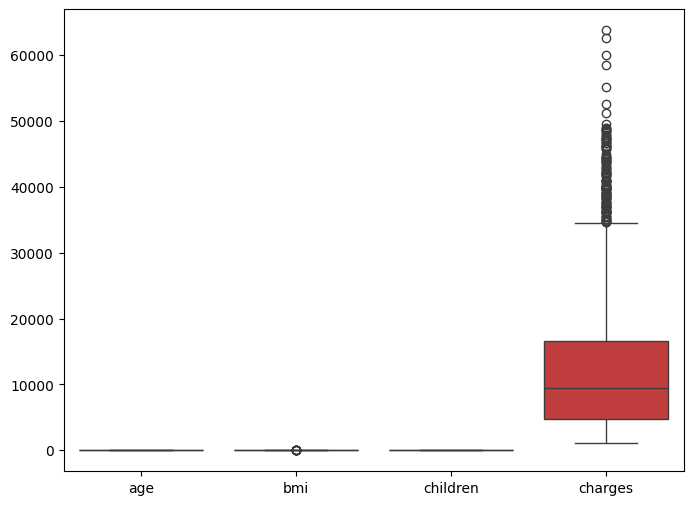

In [13]:
# Boxplot for numerical features
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["age", "bmi", "children", "charges"]])
plt.show()


* Distribution of Target Variable (charges)

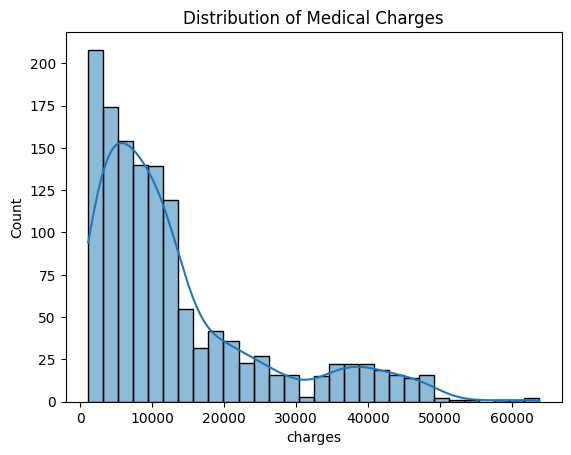

In [14]:
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()


#  **Bivariate Analysis** (Feature Relationships)

* Correlation Heatmap

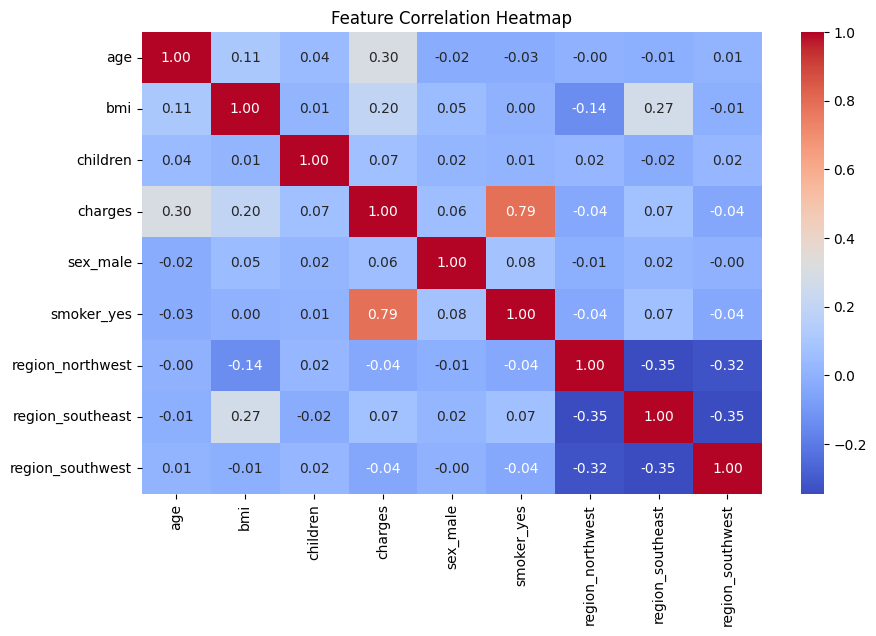

In [15]:
#Helps identify features highly correlated with charges.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

* Scatter Plots (Numerical Features vs Target)

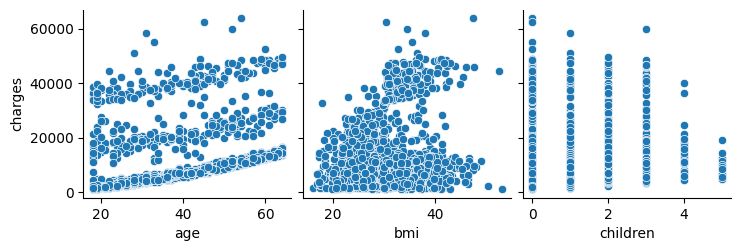

In [16]:
#This helps see trends between features and charges.
sns.pairplot(df, y_vars=["charges"], x_vars=["age", "bmi", "children"])
plt.show()

* Boxplots for Categorical Features

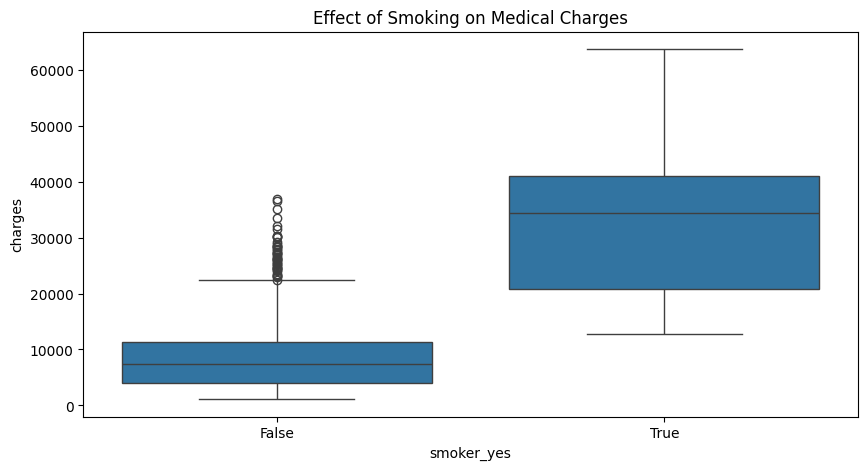

In [17]:
#Smoking has a strong impact on medical charges.
plt.figure(figsize=(10, 5))
sns.boxplot(x="smoker_yes", y="charges", data=df)
plt.title("Effect of Smoking on Medical Charges")
plt.show()

 # **Outlier Detection & Handling**

In [18]:
Q1 = df["charges"].quantile(0.25)
Q3 = df["charges"].quantile(0.75)
IQR = Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
df = df[(df["charges"] > lower_bound) & (df["charges"] < upper_bound)]

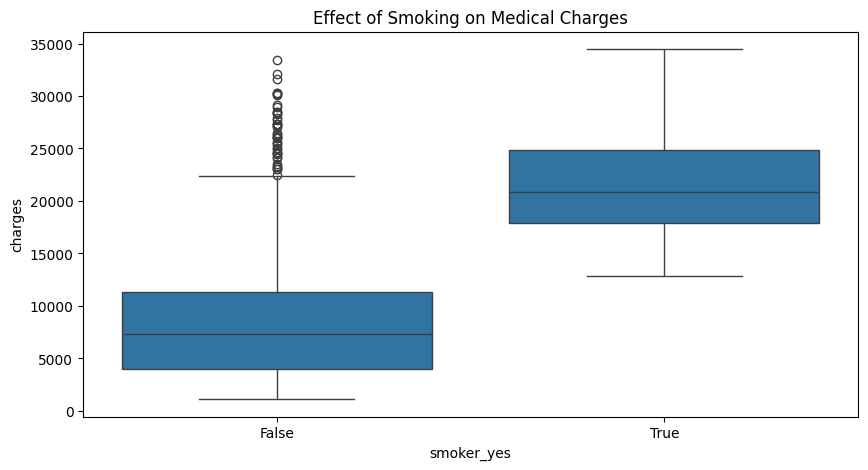

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="smoker_yes", y="charges", data=df)
plt.title("Effect of Smoking on Medical Charges")
plt.show()

#**Feature Engineering**

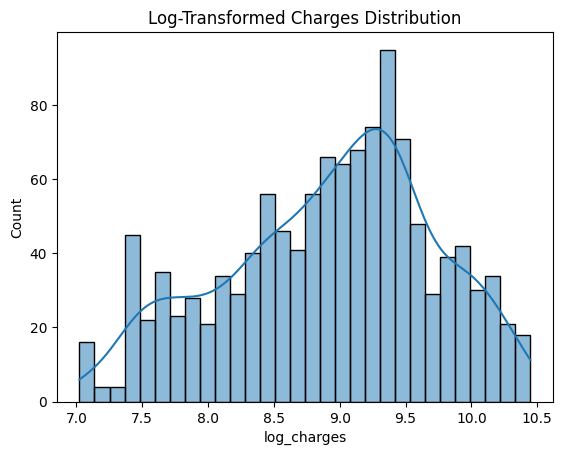

In [22]:
df["log_charges"] = np.log(df["charges"])
sns.histplot(df["log_charges"], bins=30, kde=True)
plt.title("Log-Transformed Charges Distribution")
plt.show()


* Scaling Numerical Features

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["age", "bmi", "children"]] = scaler.fit_transform(df[["age", "bmi", "children"]])

#  **Model Training & Evaluation**

* Split Data into Training & Testing Sets

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["charges"])
y = df["charges"]
print(X.shape)
print(y.shape)

(1199, 9)
(1199,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Train Regression Models

In [26]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [27]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {"Linear Regression": lr, "Decision Tree": dt, "Random Forest": rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")



Linear Regression Performance:
R² Score: 0.8755
MAE: 1969.20
RMSE: 2786.63

Decision Tree Performance:
R² Score: 0.9996
MAE: 54.65
RMSE: 148.40

Random Forest Performance:
R² Score: 0.9999
MAE: 30.10
RMSE: 75.86
